# Data Science and Visualization (RUC F2023)

## Mini project Report



# Project Title: Exploring the data set World Happiness 2021 by preprocessing, visualization and modelling

## Group Members:

- Caroline K. Lerdahl, HIB, 3rd year, [cakjle@ruc.dk](mailto:cakjle@ruc.dk)
- Ingvar Hjartarson, INM, 3rd year, [inhj@ruc.dk](mailto:inhj@ruc.dk)
- Pia Tofte, INM, 3rd year, [ptofte@ruc.dk](mailto:ptofte@ruc.dk) 
- Sara M. Jedari, INM, 3rd year, [smothj@ruc.dk](http://ruc.dk)


## Abstract

This mini project report aimed to present the handling of missing values, conduct exploratory data analysis (EDA), and classification on the data set, World Happiness 2021. In order to specify the data set, four columns were excluded in the first two sections. The EDA section showed the visualisation of data using pie chart, bar plot, and line plot. In the classification section, the selected columns were validated with an accuracy of 40-50%, which was due to low amount of data.The confusion matrix was used to visualise the comparison between predicted and actual classes, and precision was calculated for each matrix. A scatter plot with a regression line was created to demonstrate the extent of the correlation between the two variables, where a correlation at 0.61 was obtained.

## 0. Setup and Data

Import the modules needed for the project.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import sklearn
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### The different libraries and their functions:

**_pandas_** - helps to make data manipulation and analysis tools for working with structured data

**_numpy_** - provides support for multi-dimensional arrays, mathematical functions, linear algebra, and random number generation

**_matplotlib.pyplot_** - gives a variety of tools for creating data visualizations of the given data

**_matplotlib inline_** - provides for easier data visualization

**_statsmodels.formula.api_** - enables formula-based specification of diverse statistical models, such as linear regression and others

**_sklearn_** - offers an extensive set of resources to construct and use machine learning models, such as the following below:

**_metrics_** - helps to evaluate and compare the performance of machine learning models

**_plot_confusion_matrix_** - generates a graphical representation of the confusion matrix for a given classification model

**_accuracy_score_** - returns the accuracy of a classification model by comparing the predicted and actual class labels

**_train_test_split_** - offter to randomly divides a data set into two separate subsets, one intended for training a machine learning model, and the other to evaluate its performance

**_DecisionTreeClassifier_** - creates a decision tree model based on the input features and allows for classification of the data

## Data description:


Our data set about world's happiness from 2021 is found on [kaggle.com](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report.csv). Two data sets are downloaded where the first data set is ordered after highest score whereas the second data set consists of yearly progression for each country. We decided to add Regional indicator from data set one to data set two.

## 1. Loading the Data

The primary data set is loaded:

In [2]:
df_primary = pd.read_csv('world-happiness-report.csv') 

The secondary data is loaded:

In [3]:
df_secondary = pd.read_csv('world-happiness-report-2021.csv') 

The two data sets are merged, where column *Regional indicator* is added to the primary data set by according to *Country name* in both data sets.

In [4]:
df_merged = pd.merge(df_secondary[['Country name', 'Regional indicator']], df_primary, on='Country name', how='right') 

pd.set_option('display.max_rows', None) #Causes all rows to be displayed each time a dataframe is printet

df_merged 

Country name                  Regional indicator  year  \
0                   Afghanistan                          South Asia  2008   
1                   Afghanistan                          South Asia  2009   
2                   Afghanistan                          South Asia  2010   
3                   Afghanistan                          South Asia  2011   
4                   Afghanistan                          South Asia  2012   
5                   Afghanistan                          South Asia  2013   
6                   Afghanistan                          South Asia  2014   
7                   Afghanistan                          South Asia  2015   
8                   Afghanistan                          South Asia  2016   
9                   Afghanistan                          South Asia  2017   
10                  Afghanistan                          South Asia  2018   
11                  Afghanistan                          South Asia  2019   
12                      Albania          Central and Eastern Europe  2007   
13                      Albania          Central and Eastern Europe  2009   
14                      Albania          Central and Eastern Europe  2010   
15                      Albania          Central and Eastern Europe  2011   
16                      Albania          Central and Eastern Europe  2012   
17                      Albania          Central and Eastern Europe  2013   
18                      Albania          Central and Eastern Europe  2014   
19                      Albania          Central and Eastern Europe  2015   
20                      Albania          Central and Eastern Europe  2016   
21                      Albania          Central and Eastern Europe  2017   
22                      Albania          Central and Eastern Europe  2018   
23                      Albania          Central and Eastern Europe  2019   
24                      Albania          Central and Eastern Europe  2020   
25                      Algeria        Middle East and North Africa  2010   
26                      Algeria        Middle East and North Africa  2011   
27                      Algeria        Middle East and North Africa  2012   
28                      Algeria        Middle East and North Africa  2014   
29                      Algeria        Middle East and North Africa  2016   
30                      Algeria        Middle East and North Africa  2017   
31                      Algeria        Middle East and North Africa  2018   
32                      Algeria        Middle East and North Africa  2019   
33                       Angola                                 NaN  2011   
34                       Angola                                 NaN  2012   
35                       Angola                                 NaN  2013   
36                       Angola                                 NaN  2014   
37                    Argentina         Latin America and Caribbean  2006   
38                    Argentina         Latin America and Caribbean  2007   
39                    Argentina         Latin America and Caribbean  2008   
40                    Argentina         Latin America and Caribbean  2009   
41                    Argentina         Latin America and Caribbean  2010   
42                    Argentina         Latin America and Caribbean  2011   
43                    Argentina         Latin America and Caribbean  2012   
44                    Argentina         Latin America and Caribbean  2013   
45                    Argentina         Latin America and Caribbean  2014   
46                    Argentina         Latin America and Caribbean  2015   
47                    Argentina         Latin America and Caribbean  2016   
48                    Argentina         Latin America and Caribbean  2017   
49                    Argentina         Latin America and Caribbean  2018   
50                    Argentina         Latin America and Caribbean  2019   
51             

The columns of the dataframe are displayed below:

In [5]:
df_merged.columns

Index(['Country name', 'Regional indicator', 'year', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

The columns *Positive affect* and *Negative affect* are excluded since they are considered implicit and specified in other categories; therefore, they will not be used here.

In [6]:
feature_cols = df_merged.columns.drop(['Positive affect', 'Negative affect',])
df = df_merged[feature_cols] 
df

Country name                  Regional indicator  year  \
0                   Afghanistan                          South Asia  2008   
1                   Afghanistan                          South Asia  2009   
2                   Afghanistan                          South Asia  2010   
3                   Afghanistan                          South Asia  2011   
4                   Afghanistan                          South Asia  2012   
5                   Afghanistan                          South Asia  2013   
6                   Afghanistan                          South Asia  2014   
7                   Afghanistan                          South Asia  2015   
8                   Afghanistan                          South Asia  2016   
9                   Afghanistan                          South Asia  2017   
10                  Afghanistan                          South Asia  2018   
11                  Afghanistan                          South Asia  2019   
12                      Albania          Central and Eastern Europe  2007   
13                      Albania          Central and Eastern Europe  2009   
14                      Albania          Central and Eastern Europe  2010   
15                      Albania          Central and Eastern Europe  2011   
16                      Albania          Central and Eastern Europe  2012   
17                      Albania          Central and Eastern Europe  2013   
18                      Albania          Central and Eastern Europe  2014   
19                      Albania          Central and Eastern Europe  2015   
20                      Albania          Central and Eastern Europe  2016   
21                      Albania          Central and Eastern Europe  2017   
22                      Albania          Central and Eastern Europe  2018   
23                      Albania          Central and Eastern Europe  2019   
24                      Albania          Central and Eastern Europe  2020   
25                      Algeria        Middle East and North Africa  2010   
26                      Algeria        Middle East and North Africa  2011   
27                      Algeria        Middle East and North Africa  2012   
28                      Algeria        Middle East and North Africa  2014   
29                      Algeria        Middle East and North Africa  2016   
30                      Algeria        Middle East and North Africa  2017   
31                      Algeria        Middle East and North Africa  2018   
32                      Algeria        Middle East and North Africa  2019   
33                       Angola                                 NaN  2011   
34                       Angola                                 NaN  2012   
35                       Angola                                 NaN  2013   
36                       Angola                                 NaN  2014   
37                    Argentina         Latin America and Caribbean  2006   
38                    Argentina         Latin America and Caribbean  2007   
39                    Argentina         Latin America and Caribbean  2008   
40                    Argentina         Latin America and Caribbean  2009   
41                    Argentina         Latin America and Caribbean  2010   
42                    Argentina         Latin America and Caribbean  2011   
43                    Argentina         Latin America and Caribbean  2012   
44                    Argentina         Latin America and Caribbean  2013   
45                    Argentina         Latin America and Caribbean  2014   
46                    Argentina         Latin America and Caribbean  2015   
47                    Argentina         Latin America and Caribbean  2016   
48                    Argentina         Latin America and Caribbean  2017   
49                    Argentina         Latin America and Caribbean  2018   
50                    Argentina         Latin America and Caribbean  2019   
51             

For aesthetic reasons, the space is replaced with underscore (\_) in the headings in the dataframe.

In [7]:
df.columns = df.columns.str.replace(' ', '_')
df

Country_name                  Regional_indicator  year  \
0                   Afghanistan                          South Asia  2008   
1                   Afghanistan                          South Asia  2009   
2                   Afghanistan                          South Asia  2010   
3                   Afghanistan                          South Asia  2011   
4                   Afghanistan                          South Asia  2012   
5                   Afghanistan                          South Asia  2013   
6                   Afghanistan                          South Asia  2014   
7                   Afghanistan                          South Asia  2015   
8                   Afghanistan                          South Asia  2016   
9                   Afghanistan                          South Asia  2017   
10                  Afghanistan                          South Asia  2018   
11                  Afghanistan                          South Asia  2019   
12                      Albania          Central and Eastern Europe  2007   
13                      Albania          Central and Eastern Europe  2009   
14                      Albania          Central and Eastern Europe  2010   
15                      Albania          Central and Eastern Europe  2011   
16                      Albania          Central and Eastern Europe  2012   
17                      Albania          Central and Eastern Europe  2013   
18                      Albania          Central and Eastern Europe  2014   
19                      Albania          Central and Eastern Europe  2015   
20                      Albania          Central and Eastern Europe  2016   
21                      Albania          Central and Eastern Europe  2017   
22                      Albania          Central and Eastern Europe  2018   
23                      Albania          Central and Eastern Europe  2019   
24                      Albania          Central and Eastern Europe  2020   
25                      Algeria        Middle East and North Africa  2010   
26                      Algeria        Middle East and North Africa  2011   
27                      Algeria        Middle East and North Africa  2012   
28                      Algeria        Middle East and North Africa  2014   
29                      Algeria        Middle East and North Africa  2016   
30                      Algeria        Middle East and North Africa  2017   
31                      Algeria        Middle East and North Africa  2018   
32                      Algeria        Middle East and North Africa  2019   
33                       Angola                                 NaN  2011   
34                       Angola                                 NaN  2012   
35                       Angola                                 NaN  2013   
36                       Angola                                 NaN  2014   
37                    Argentina         Latin America and Caribbean  2006   
38                    Argentina         Latin America and Caribbean  2007   
39                    Argentina         Latin America and Caribbean  2008   
40                    Argentina         Latin America and Caribbean  2009   
41                    Argentina         Latin America and Caribbean  2010   
42                    Argentina         Latin America and Caribbean  2011   
43                    Argentina         Latin America and Caribbean  2012   
44                    Argentina         Latin America and Caribbean  2013   
45                    Argentina         Latin America and Caribbean  2014   
46                    Argentina         Latin America and Caribbean  2015   
47                    Argentina         Latin America and Caribbean  2016   
48                    Argentina         Latin America and Caribbean  2017   
49                    Argentina         Latin America and Caribbean  2018   
50                    Argentina         Latin America and Caribbean  2019   
51             

An overview of data types for each column is displayed where object represents text, int64 represents integers, and float64 represents decimal numbers.

In [8]:
df.dtypes

Country_name                         object
Regional_indicator                   object
year                                  int64
Life_Ladder                         float64
Log_GDP_per_capita                  float64
Social_support                      float64
Healthy_life_expectancy_at_birth    float64
Freedom_to_make_life_choices        float64
Generosity                          float64
Perceptions_of_corruption           float64
dtype: object

A part of the data set is displayed by head and tail:

In [9]:
df.head()

Country_name Regional_indicator  year  Life_Ladder  Log_GDP_per_capita  \
0  Afghanistan         South Asia  2008        3.724               7.370   
1  Afghanistan         South Asia  2009        4.402               7.540   
2  Afghanistan         South Asia  2010        4.758               7.647   
3  Afghanistan         South Asia  2011        3.832               7.620   
4  Afghanistan         South Asia  2012        3.783               7.705   

   Social_support  Healthy_life_expectancy_at_birth  \
0           0.451                             50.80   
1           0.552                             51.20   
2           0.539                             51.60   
3           0.521                             51.92   
4           0.521                             52.24   

   Freedom_to_make_life_choices  Generosity  Perceptions_of_corruption  
0                         0.718       0.168                      0.882  
1                         0.679       0.190                      0.850  
2                         0.600       0.121                      0.707  
3                         0.496       0.162                      0.731  
4                         0.531       0.236                      0.776

In [10]:
df.tail()

Country_name  Regional_indicator  year  Life_Ladder  Log_GDP_per_capita  \
1944     Zimbabwe  Sub-Saharan Africa  2016        3.735               7.984   
1945     Zimbabwe  Sub-Saharan Africa  2017        3.638               8.016   
1946     Zimbabwe  Sub-Saharan Africa  2018        3.616               8.049   
1947     Zimbabwe  Sub-Saharan Africa  2019        2.694               7.950   
1948     Zimbabwe  Sub-Saharan Africa  2020        3.160               7.829   

      Social_support  Healthy_life_expectancy_at_birth  \
1944           0.768                              54.4   
1945           0.754                              55.0   
1946           0.775                              55.6   
1947           0.759                              56.2   
1948           0.717                              56.8   

      Freedom_to_make_life_choices  Generosity  Perceptions_of_corruption  
1944                         0.733      -0.095                      0.724  
1945                         0.753      -0.098                      0.751  
1946                         0.763      -0.068                      0.844  
1947                         0.632      -0.064                      0.831  
1948                         0.643      -0.009                      0.789

The shape of the data set is defined below where the number of rows are 1949 and the number of columns are 10:

In [11]:
df.shape

(1949, 10)

The numbers of *Regional indicators* in the data set is 10:

In [12]:
df['Regional_indicator'].nunique()

10

The numbers of *Country name* in the data set is 166:

In [13]:
df['Country_name'].nunique()

166

The statistics of the data set are considered for each column. 

In [14]:
df.describe()

year  Life_Ladder  Log_GDP_per_capita  Social_support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy_life_expectancy_at_birth  Freedom_to_make_life_choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.258000   
25%                           58.685000                      0.647000   
50%                           65.200000                      0.763000   
75%                           68.590000                      0.856000   
max                           77.100000                      0.985000   

        Generosity  Perceptions_of_corruption  
count  1860.000000                1839.000000  
mean      0.000103                   0.747125  
std       0.162215                   0.186789  
min      -0.335000                   0.035000  
25%      -0.113000                   0.690000  
50%      -0.025500                   0.802000  
75%       0.091000                   0.872000  
max       0.698000                   0.983000

## 2. Data Preprocessing

In this section missing values (NaN) are handled.

### Missing values (NaN)
The data for each column is tested for any missing values:

In [15]:
df.isna().sum()

Country_name                          0
Regional_indicator                   63
year                                  0
Life_Ladder                           0
Log_GDP_per_capita                   36
Social_support                       13
Healthy_life_expectancy_at_birth     55
Freedom_to_make_life_choices         32
Generosity                           89
Perceptions_of_corruption           110
dtype: int64

The columns with the highest number of missing values thereby *Perception of corruption* and *Generosity* are excluded to reduce the accumulated value of the correction for missing values. The other columns with missing values will be manually corrected without affecting the accumulated value.

In [16]:
feature_cols = df.columns.drop(['Generosity', 'Perceptions_of_corruption'])
feature_cols

Index(['Country_name', 'Regional_indicator', 'year', 'Life_Ladder',
       'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices'],
      dtype='object')

In [17]:
df = df[feature_cols]
df.isna().sum()

Country_name                         0
Regional_indicator                  63
year                                 0
Life_Ladder                          0
Log_GDP_per_capita                  36
Social_support                      13
Healthy_life_expectancy_at_birth    55
Freedom_to_make_life_choices        32
dtype: int64

The overview is updated where *Perception of corruption* and *Generosity* are removed.

The missing values (NaN) are displayed acoording to row and column:

In [18]:
missing_values = df[df.isna().any(axis=1)] 
missing_values

Country_name                  Regional_indicator  year  \
25                      Algeria        Middle East and North Africa  2010   
28                      Algeria        Middle East and North Africa  2014   
29                      Algeria        Middle East and North Africa  2016   
33                       Angola                                 NaN  2011   
34                       Angola                                 NaN  2012   
35                       Angola                                 NaN  2013   
36                       Angola                                 NaN  2014   
112                     Bahrain        Middle East and North Africa  2014   
161                      Belize                                 NaN  2007   
162                      Belize                                 NaN  2014   
175                      Bhutan                                 NaN  2013   
176                      Bhutan                                 NaN  2014   
177                      Bhutan                                 NaN  2015   
263                    Cambodia                      Southeast Asia  2006   
294                      Canada               North America and ANZ  2007   
308    Central African Republic                                 NaN  2007   
309    Central African Republic                                 NaN  2010   
310    Central African Republic                                 NaN  2011   
311    Central African Republic                                 NaN  2016   
312    Central African Republic                                 NaN  2017   
342                       China                           East Asia  2006   
343                       China                           East Asia  2007   
350                       China                           East Asia  2014   
351                       China                           East Asia  2015   
352                       China                           East Asia  2016   
388            Congo (Kinshasa)                                 NaN  2009   
389            Congo (Kinshasa)                                 NaN  2011   
390            Congo (Kinshasa)                                 NaN  2012   
391            Congo (Kinshasa)                                 NaN  2013   
392            Congo (Kinshasa)                                 NaN  2014   
393            Congo (Kinshasa)                                 NaN  2015   
394            Congo (Kinshasa)                                 NaN  2016   
395            Congo (Kinshasa)                                 NaN  2017   
423                        Cuba                                 NaN  2006   
436                      Cyprus                      Western Europe  2020   
464                    Djibouti                                 NaN  2008   
465                    Djibouti                                 NaN  2009   
466                    Djibouti                                 NaN  2010   
467                    Djibouti                                 NaN  2011   
500                       Egypt        Middle East and North Africa  2008   
673                      Guyana                                 NaN  2007   
699   Hong Kong S.A.R. of China                           East Asia  2006   
700   Hong Kong S.A.R. of China                           East Asia  2008   
701   Hong Kong S.A.R. of China                           East Asia  2009   
702   Hong Kong S.A.R. of China                           East Asia  2010   
703   Hong Kong S.A.R. of China                           East Asia  2011   
704   Hong Kong S.A.R. of China                           East Asia  2012   
705   Hong Kong S.A.R. of China                           East Asia  2014   
706   Hong Kong S.A.R. of China                           East Asia  2016   
707   Hong Kong S.A.R. of China                           East Asia  2017   
708   Hong Kong S.A.R. of China                           East Asia  2019   
709   Hong Kong

### 2.1 Example of dealing with missing values (NaN)

In this section missing values (NaN) are replaced with the mean from the column of interest acoording to years in each country. This is perfomed to conduct modelling further on. 

The table displays every 'NaN' for the column *Freedom to make life choices*:

In [19]:
missing_values[['Country_name' , 'Freedom_to_make_life_choices']]

Country_name  Freedom_to_make_life_choices
25                      Algeria                         0.593
28                      Algeria                           NaN
29                      Algeria                           NaN
33                       Angola                         0.584
34                       Angola                         0.456
35                       Angola                         0.410
36                       Angola                         0.375
112                     Bahrain                           NaN
161                      Belize                         0.705
162                      Belize                         0.874
175                      Bhutan                         0.810
176                      Bhutan                         0.834
177                      Bhutan                         0.830
263                    Cambodia                           NaN
294                      Canada                         0.930
308    Central African Republic                         0.663
309    Central African Republic                         0.690
310    Central African Republic                         0.780
311    Central African Republic                         0.624
312    Central African Republic                         0.645
342                       China                           NaN
343                       China                           NaN
350                       China                           NaN
351                       China                           NaN
352                       China                           NaN
388            Congo (Kinshasa)                         0.556
389            Congo (Kinshasa)                         0.631
390            Congo (Kinshasa)                         0.557
391            Congo (Kinshasa)                         0.480
392            Congo (Kinshasa)                         0.556
393            Congo (Kinshasa)                         0.574
394            Congo (Kinshasa)                         0.637
395            Congo (Kinshasa)                         0.704
423                        Cuba                         0.281
436                      Cyprus                         0.763
464                    Djibouti                         0.773
465                    Djibouti                         0.649
466                    Djibouti                         0.764
467                    Djibouti                         0.746
500                       Egypt                           NaN
673                      Guyana                         0.694
699   Hong Kong S.A.R. of China                         0.910
700   Hong Kong S.A.R. of China                         0.922
701   Hong Kong S.A.R. of China                         0.918
702   Hong Kong S.A.R. of China                         0.890
703   Hong Kong S.A.R. of China                         0.894
704   Hong Kong S.A.R. of China                         0.880
705   Hong Kong S.A.R. of China                         0.843
706   Hong Kong S.A.R. of China                         0.800
707   Hong Kong S.A.R. of China                         0.831
708   Hong Kong S.A.R. of China                         0.727
709   Hong Kong S.A.R. of China                         0.705
771                        Iran                         0.603
772                        Iran                         0.623
773                        Iran                         0.600
779                        Iraq                           NaN
860                      Jordan                           NaN
862                      Jordan                           NaN
905                      Kosovo                         0.381
906                      Kosovo                           NaN
907                      Kosovo                         0.506
908                      Kosovo                         0.451
909                      Kosovo                         0.589
910                      Kosovo                    

All the missing values (NaN) are replaced with the mean as mentioned earlier:

In [20]:
df['Freedom_to_make_life_choices'].fillna(df.groupby('Country_name')['Freedom_to_make_life_choices'].transform('mean'), inplace=True)
#Credits to: Elective Course: Data Science and Visualization, Lecture2-4_Fortune500

C:\Users\ingv0\AppData\Local\Temp\ipykernel_14684\2539049483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Freedom_to_make_life_choices'].fillna(df.groupby('Country_name')['Freedom_to_make_life_choices'].transform('mean'), inplace=True)


The data set is checked for missing values (NaN) in the column *Freedom to make life choices*:

In [21]:
df['Freedom_to_make_life_choices'].isna().sum()

0

The same is made for the other columns *Healthy life expectany at birth*, *Social support* and *Log GDP per capita*. However, it can not be made for the column *Regional indicator* since it's a string.

In [22]:
df['Healthy_life_expectancy_at_birth'].fillna(df.groupby('Country_name')['Healthy_life_expectancy_at_birth'].transform('mean'), inplace=True)
#Credits to: Elective Course: Data Science and Visualization, Lecture2-4_Fortune500

C:\Users\ingv0\AppData\Local\Temp\ipykernel_14684\583315311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Healthy_life_expectancy_at_birth'].fillna(df.groupby('Country_name')['Healthy_life_expectancy_at_birth'].transform('mean'), inplace=True)


In [23]:
df['Social_support'].fillna(df.groupby('Country_name')['Social_support'].transform('mean'), inplace=True) 
#Credits to: Elective Course: Data Science and Visualization, Lecture2-4_Fortune500

C:\Users\ingv0\AppData\Local\Temp\ipykernel_14684\2013083870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Social_support'].fillna(df.groupby('Country_name')['Social_support'].transform('mean'), inplace=True)


In [24]:
df['Log_GDP_per_capita'].fillna(df.groupby('Country_name')['Log_GDP_per_capita'].transform('mean'), inplace=True) 
#Credits to: Elective Course: Data Science and Visualization, Lecture2-4_Fortune500

C:\Users\ingv0\AppData\Local\Temp\ipykernel_14684\221482840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_GDP_per_capita'].fillna(df.groupby('Country_name')['Log_GDP_per_capita'].transform('mean'), inplace=True)


Additionally, the data set is checked for missing values in the columns:

In [25]:
df.isna().sum()

Country_name                         0
Regional_indicator                  63
year                                 0
Life_Ladder                          0
Log_GDP_per_capita                  19
Social_support                       1
Healthy_life_expectancy_at_birth    36
Freedom_to_make_life_choices         0
dtype: int64

Unfortunately, there are still missing values. This is caused by the present of missing values in the specific column *Regional indicator* for a specific country, thereby no values are present and no mean can be calculated. 

### 2.2 Manual adjustment of the missing values for *Regional indicator*

By examinating the column *Regional indicator*, it has 63 missing values which indicates that 63 rows have no region associated. These 63 rows are associated with countries that appear once or multiple times acoording to years. Therfore, the countries are given a region manually by using Google Maps and is encoded below:

In [26]:
df.loc[df['Country_name'].isin(['Belize','Cuba','Guyana','Suriname','Trinidad and Tobago']),'Regional_indicator']='Latin America and Caribbean'
#Credit: Inspiration from ChatGPT

In [27]:
df.loc[df['Country_name'].isin(['Oman','Qatar','Syria']),'Regional_indicator']='Middle East and North Africa'
#Credit: Inspiration from ChatGPT

In [28]:
df.loc[df['Country_name'].isin(['Bhutan']),'Regional_indicator']='South Asia'
#Credit: Inspiration from ChatGPT

In [29]:
df.loc[df['Country_name'].isin(['Angola','Central African Republic','Congo (Kinshasa)','Djibouti','Somalia','Somaliland region','South Sudan','Sudan']),'Regional_indicator']='Sub-Saharan Africa'
#Credit: Inspiration from ChatGPT

Subsequently, the column *Regional indicator* is checked for missing values:

In [30]:
df['Regional_indicator'].isna().sum()

0

The remaining missing values are in columns *Log GDP per capita*, *Social support*, and *Healthy life ecpectancy at birth*:

In [31]:
df.isna().sum()

Country_name                         0
Regional_indicator                   0
year                                 0
Life_Ladder                          0
Log_GDP_per_capita                  19
Social_support                       1
Healthy_life_expectancy_at_birth    36
Freedom_to_make_life_choices         0
dtype: int64

In the following columns *Log GDP per capita*, *Social support*, and *Healthy life ecpectancy at birth* the missing values are replaced with the mean from each representetative regions:

In [32]:
df['Log_GDP_per_capita'].fillna(df.groupby('Regional_indicator')['Log_GDP_per_capita'].transform('mean'), inplace=True)
#Credits to: Elective Course: Data Science and Visualization, Lecture2-4_Fortune500

C:\Users\ingv0\AppData\Local\Temp\ipykernel_14684\311826748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_GDP_per_capita'].fillna(df.groupby('Regional_indicator')['Log_GDP_per_capita'].transform('mean'), inplace=True)


In [33]:
df['Social_support'].fillna(df.groupby('Regional_indicator')['Social_support'].transform('mean'), inplace=True)
#Credits to: Elective Course: Data Science and Visualization, Lecture2-4_Fortune500

C:\Users\ingv0\AppData\Local\Temp\ipykernel_14684\2730325615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Social_support'].fillna(df.groupby('Regional_indicator')['Social_support'].transform('mean'), inplace=True)


In [34]:
df['Healthy_life_expectancy_at_birth'].fillna(df.groupby('Regional_indicator')['Healthy_life_expectancy_at_birth'].transform('mean'), inplace=True)
#Credits to: Elective Course: Data Science and Visualization, Lecture2-4_Fortune500

C:\Users\ingv0\AppData\Local\Temp\ipykernel_14684\3065430756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Healthy_life_expectancy_at_birth'].fillna(df.groupby('Regional_indicator')['Healthy_life_expectancy_at_birth'].transform('mean'), inplace=True)


Lastly to control that there are no more missing values it is being checked again:

In [35]:
df.isna().sum()

Country_name                        0
Regional_indicator                  0
year                                0
Life_Ladder                         0
Log_GDP_per_capita                  0
Social_support                      0
Healthy_life_expectancy_at_birth    0
Freedom_to_make_life_choices        0
dtype: int64

All missing values for the dataset have now been procesed succesfully.

## 3. Exploratory Data Analysis

In this chapter, various visualisation techniques, including pie charts, bar charts, and line plots, is used to explore the *Healthy life expectancy at birth* and *Log GDP per capita*. These visualisations will help examining data to uncover patterns and gain insights.

A pie chart is created to demonstrate the percentage of each region by the *Regional indicator* within the dataset:

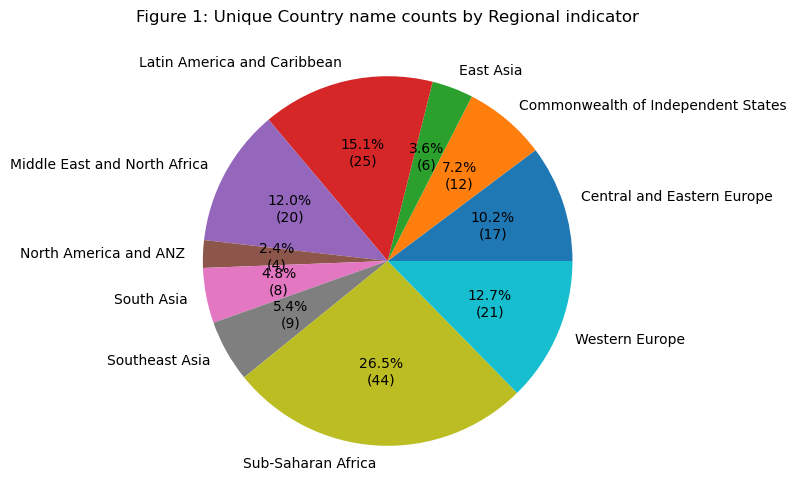

In [36]:
unique_count = df.groupby('Regional_indicator')['Country_name'].nunique()
plt.figure(figsize=(6, 6))
plt.pie(unique_count, labels=unique_count.index, autopct=lambda pct: f'{pct:.1f}%\n({int(round(pct/100*unique_count.sum(), 0))})')
plt.title('Figure 1: Unique Country name counts by Regional indicator')
plt.show()
#Credit: Inspiration from ChatGPT

To visualize the data a line plot is plotted in relation to *Log GDP per capita*, where *years* is x-values and *Log GDP per capita* is y-values. For visualizing the progression throughout the years, the mean has been calculated for each *Regional indicator*:

In [37]:
df_regional_year_GDP_mean = df.groupby(['Regional_indicator', 'year'])['Log_GDP_per_capita'].mean().reset_index()
df_regional_year_GDP_mean

Regional_indicator  year  Log_GDP_per_capita
0            Central and Eastern Europe  2005           10.001250
1            Central and Eastern Europe  2006           10.153200
2            Central and Eastern Europe  2007            9.797400
3            Central and Eastern Europe  2008            9.897500
4            Central and Eastern Europe  2009            9.790929
5            Central and Eastern Europe  2010            9.833400
6            Central and Eastern Europe  2011            9.894000
7            Central and Eastern Europe  2012            9.902588
8            Central and Eastern Europe  2013            9.922588
9            Central and Eastern Europe  2014            9.947765
10           Central and Eastern Europe  2015            9.984118
11           Central and Eastern Europe  2016           10.017941
12           Central and Eastern Europe  2017           10.059706
13           Central and Eastern Europe  2018           10.101294
14           Central and Eastern Europe  2019           10.107375
15           Central and Eastern Europe  2020           10.066505
16   Commonwealth of Independent States  2006            8.976273
17   Commonwealth of Independent States  2007            9.150600
18   Commonwealth of Independent States  2008            9.130091
19   Commonwealth of Independent States  2009            9.091833
20   Commonwealth of Independent States  2010            9.145364
21   Commonwealth of Independent States  2011            9.190500
22   Commonwealth of Independent States  2012            9.224500
23   Commonwealth of Independent States  2013            9.269250
24   Commonwealth of Independent States  2014            9.298333
25   Commonwealth of Independent States  2015            9.302083
26   Commonwealth of Independent States  2016            9.317500
27   Commonwealth of Independent States  2017            9.352083
28   Commonwealth of Independent States  2018            9.387833
29   Commonwealth of Independent States  2019            9.424000
30   Commonwealth of Independent States  2020            9.334143
31                            East Asia  2005           10.529000
32                            East Asia  2006           10.091250
33                            East Asia  2007            9.644000
34                            East Asia  2008           10.027667
35                            East Asia  2009           10.165250
36                            East Asia  2010           10.088167
37                            East Asia  2011           10.139833
38                            East Asia  2012           10.176500
39                            East Asia  2013           10.081400
40                            East Asia  2014           10.258167
41                            East Asia  2015           10.151000
42                            East Asia  2016           10.303833
43                            East Asia  2017           10.335833
44                            East Asia  2018           10.205740
45                            East Asia  2019           10.357283
46                            East Asia  2020           10.326567
47          Latin America and Caribbean  2005            9.513000
48          Latin America and Caribbean  2006            9.172603
49          Latin America and Caribbean  2007            9.237421
50          Latin America and Caribbean  2008            9.292600
51          Latin America and Caribbean  2009            9.315222
52          Latin America and Caribbean  2010            9.262842
53          Latin America and Caribbean  2011            9.345381
54          Latin America and Caribbean  2012            9.354700
55          Latin America and Caribbean  2013            9.390190
56          Latin America and Caribbean  2014            9.332000
57          Latin America and Caribbean  2015            9.350947
58          Latin America and Caribbean  2016            9.363000
59          Latin America and Caribbean  2017            9.41

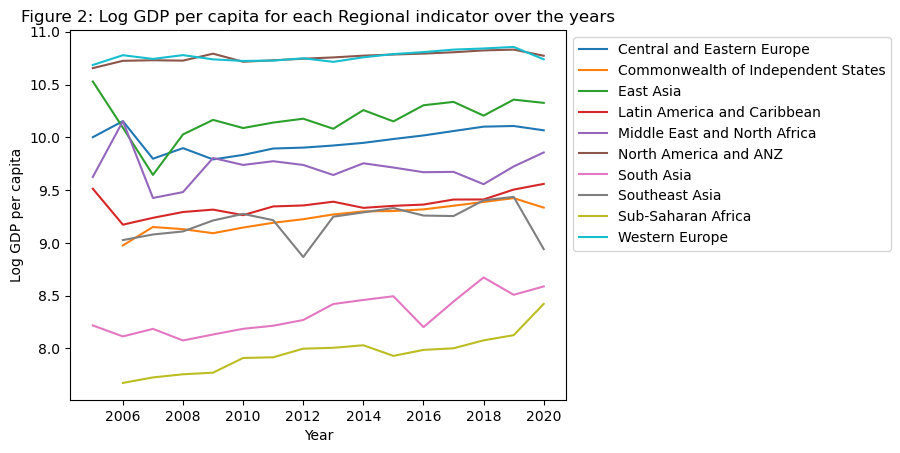

In [38]:
df_country_year_GDP_mean = df.groupby(['Regional_indicator', 'Country_name', 'year'])['Log_GDP_per_capita'].mean()

pivot_table = pd.pivot_table(df_country_year_GDP_mean.reset_index(), values='Log_GDP_per_capita', index='year', columns='Regional_indicator')

for column in pivot_table.columns:
    pivot_table[column].plot(label=column)

plt.xlabel('Year')
plt.ylabel('Log GDP per capita')
plt.title('Figure 2: Log GDP per capita for each Regional indicator over the years')
plt.legend()

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
#Credit: Inspiration from ChatGPT

A bar plot is plottet where *Regional indicator* is x-values and *Log GDP per capita* is y-values. Each bar represents the mean for the timeframe:

In [39]:
df_regional_GDP_mean = df.groupby(['Regional_indicator'])['Log_GDP_per_capita'].mean().reset_index()
df_regional_GDP_mean

Regional_indicator  Log_GDP_per_capita
0          Central and Eastern Europe            9.963503
1  Commonwealth of Independent States            9.240641
2                           East Asia           10.175668
3         Latin America and Caribbean            9.349056
4        Middle East and North Africa            9.704054
5               North America and ANZ           10.763879
6                          South Asia            8.334609
7                      Southeast Asia            9.205379
8                  Sub-Saharan Africa            7.958327
9                      Western Europe           10.771935

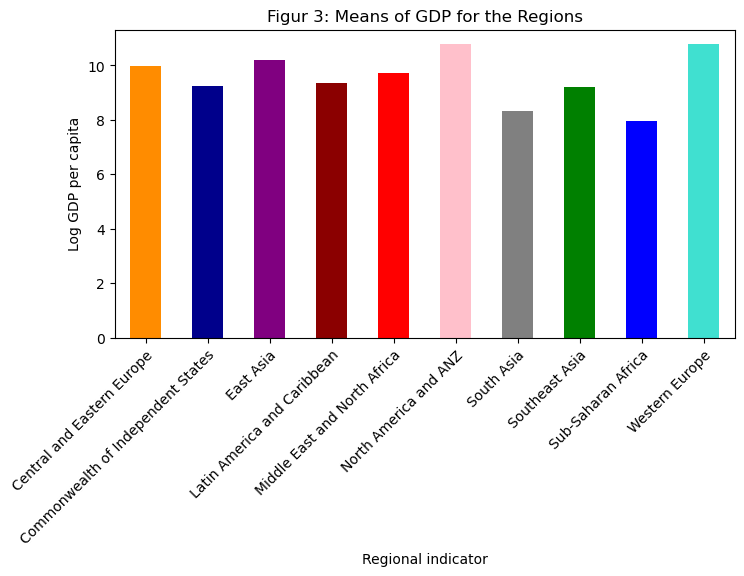

In [40]:
df_regional_GDP_mean.plot.bar(
x='Regional_indicator',
y='Log_GDP_per_capita',
color=['darkorange', 'darkblue', 'purple', 'darkred','red','pink','gray', 'green', 'blue', 'turquoise'],
figsize=(8,4),
legend=False
)
plt.xlabel('Regional indicator')
plt.ylabel('Log GDP per capita')
plt.title('Figur 3: Means of GDP for the Regions')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

#Credits to: Basiskursus 1: Empiriske data

*Healthy life expectancy at birth* is plottet the same way as *Log GDP per capita* with a line plot and a bar plot.

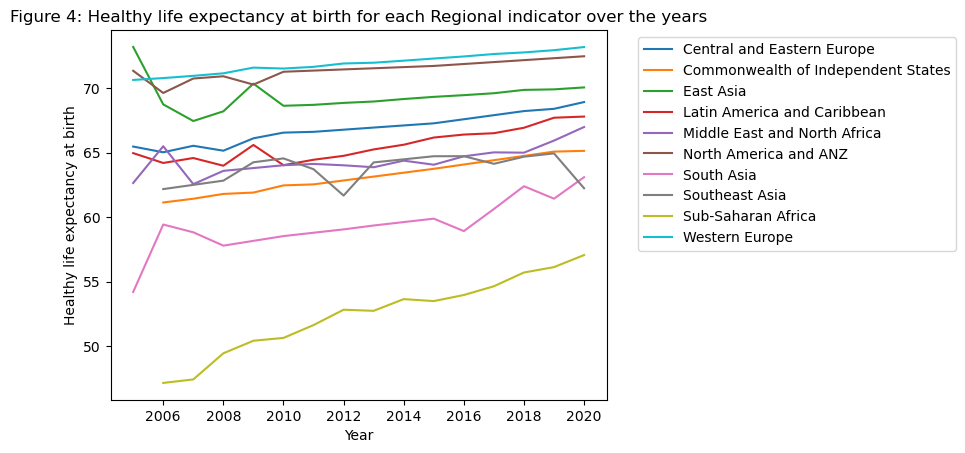

In [41]:
df_country_year_healthy_mean = df.groupby(['Regional_indicator', 'Country_name', 'year'])['Healthy_life_expectancy_at_birth'].mean()

pivot_health_table = pd.pivot_table(df_country_year_healthy_mean.reset_index(), values='Healthy_life_expectancy_at_birth', index='year', columns='Regional_indicator')

for column in pivot_table.columns:
    pivot_health_table[column].plot(label=column)

plt.xlabel('Year')
plt.ylabel('Healthy life expectancy at birth')
plt.title('Figure 4: Healthy life expectancy at birth for each Regional indicator over the years')
plt.legend()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
#Credit: Inspiration from ChatGPT

In [42]:
df_regional_healthy_mean = df.groupby(['Regional_indicator'])['Healthy_life_expectancy_at_birth'].mean().reset_index()
df_regional_healthy_mean

Regional_indicator  Healthy_life_expectancy_at_birth
0          Central and Eastern Europe                         67.136346
1  Commonwealth of Independent States                         63.185059
2                           East Asia                         69.218310
3         Latin America and Caribbean                         65.511903
4        Middle East and North Africa                         64.435925
5               North America and ANZ                         71.529655
6                          South Asia                         59.564368
7                      Southeast Asia                         63.764828
8                  Sub-Saharan Africa                         52.733170
9                      Western Europe                         72.084091

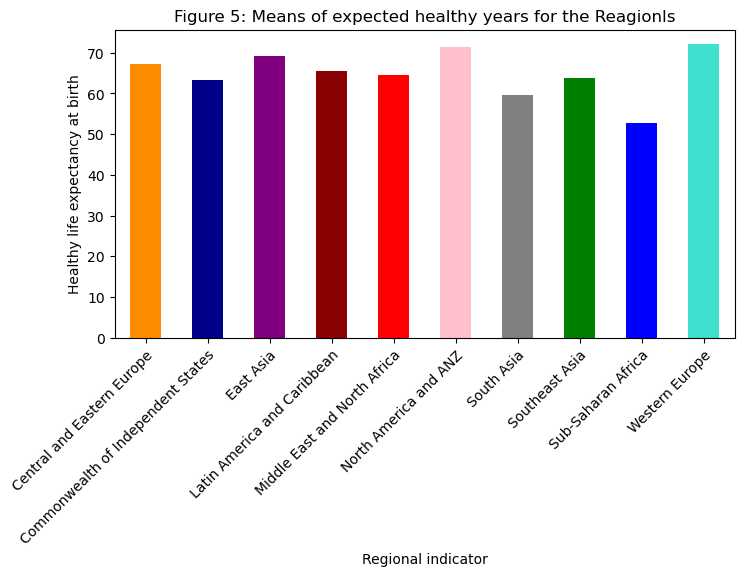

In [43]:
df_regional_healthy_mean.plot.bar(
    x='Regional_indicator',
    y='Healthy_life_expectancy_at_birth',
    color=['darkorange', 'darkblue', 'purple', 'darkred','red','pink','gray', 'green', 'blue', 'turquoise'],
    figsize=(8,4),
    legend=False
)
plt.xlabel('Regional indicator')
plt.ylabel('Healthy life expectancy at birth')
plt.title('Figure 5: Means of expected healthy years for the Reagionls')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.show()
#Credits to: Basiskursus 1: Empiriske data

Addionally, a bar plot is plotted in regard to *Healthy life expectancy at birth* throughout the *years* (2006, 2013, and 2020) where *Regional indicators* is on the x-axis and *Healthy life expectancy at birth* is on the y-axis. Every seventh year is choosen to grasp the progression and to fit the bars.

In [44]:
df_regional_year_healthy_mean = df.groupby(['Regional_indicator', 'year'])['Healthy_life_expectancy_at_birth'].mean().reset_index()
df_regional_year_healthy_mean_06_13_20 = df_regional_year_healthy_mean[df_regional_year_healthy_mean.year.isin([2006, 2013, 2020])]
df_regional_year_healthy_mean_06_13_20

Regional_indicator  year  \
1            Central and Eastern Europe  2006   
8            Central and Eastern Europe  2013   
15           Central and Eastern Europe  2020   
16   Commonwealth of Independent States  2006   
23   Commonwealth of Independent States  2013   
30   Commonwealth of Independent States  2020   
32                            East Asia  2006   
39                            East Asia  2013   
46                            East Asia  2020   
48          Latin America and Caribbean  2006   
55          Latin America and Caribbean  2013   
62          Latin America and Caribbean  2020   
64         Middle East and North Africa  2006   
71         Middle East and North Africa  2013   
78         Middle East and North Africa  2020   
80                North America and ANZ  2006   
87                North America and ANZ  2013   
94                North America and ANZ  2020   
96                           South Asia  2006   
103                          South Asia  2013   
110                          South Asia  2020   
111                      Southeast Asia  2006   
118                      Southeast Asia  2013   
125                      Southeast Asia  2020   
126                  Sub-Saharan Africa  2006   
133                  Sub-Saharan Africa  2013   
140                  Sub-Saharan Africa  2020   
142                      Western Europe  2006   
149                      Western Europe  2013   
156                      Western Europe  2020   

     Healthy_life_expectancy_at_birth  
1                           65.032000  
8                           66.948138  
15                          68.924772  
16                          61.140000  
23                          63.146667  
30                          65.142857  
32                          68.744577  
39                          68.968000  
46                          70.059718  
48                          64.203000  
55                          65.252381  
62                          67.800000  
64                          65.500000  
71                          63.870925  
78                          66.990909  
80                          69.630000  
87                          71.545000  
94                          72.475000  
96                          59.430000  
103                         59.354286  
110                         63.100000  
111                         62.177500  
118                         64.245000  
125                         62.240000  
126                         47.149091  
133                         52.738571  
140                         57.064286  
142                         70.785000  
149                         71.976005  
156                         73.189474

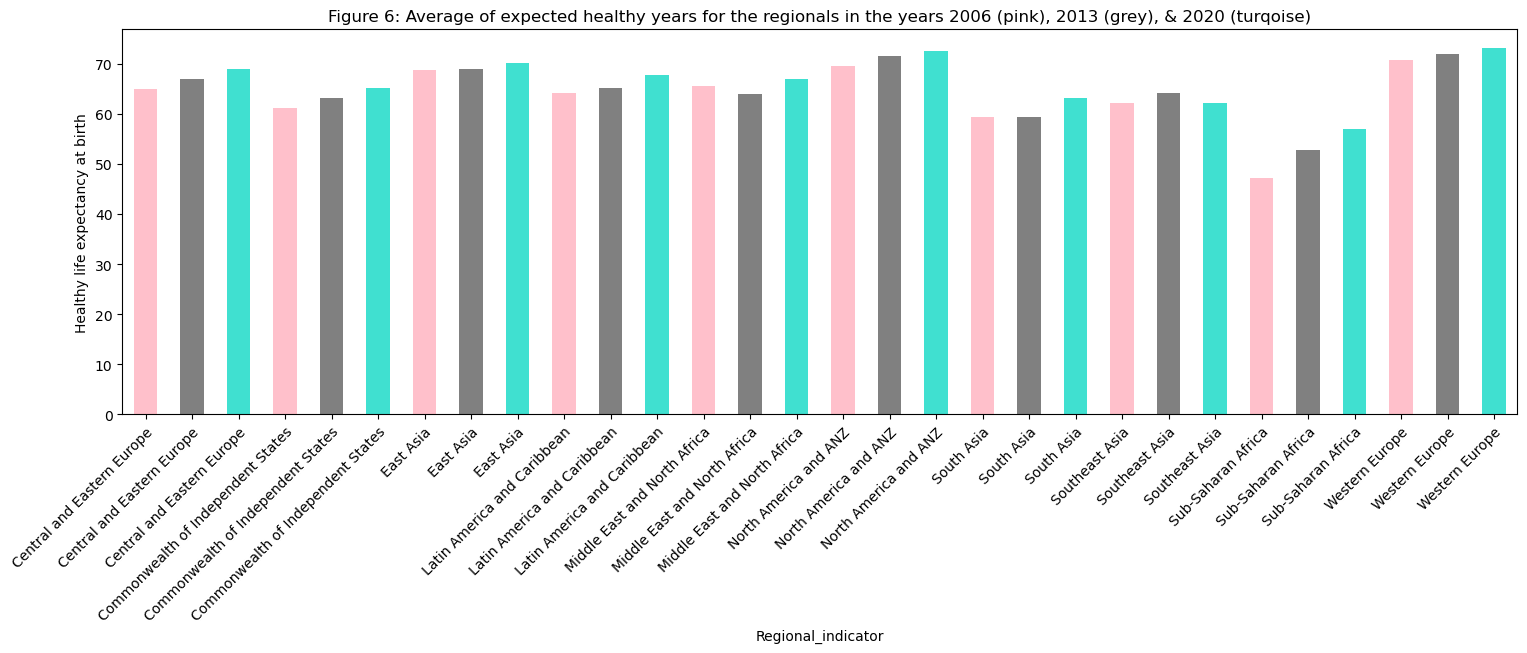

In [45]:
df_regional_year_healthy_mean_06_13_20.plot.bar(
    x='Regional_indicator', 
    y='Healthy_life_expectancy_at_birth',
    color=['pink','gray', 'turquoise'],
    figsize=(18,5),
    legend=False
)

plt.ylabel('Healthy life expectancy at birth')
plt.title('Figure 6: Average of expected healthy years for the regionals in the years 2006 (pink), 2013 (grey), & 2020 (turqoise)')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()
#Credits to: Basiskursus 1: Empiriske data
#Credit: Inspiration from ChatGPT

## 4. Data Modelling and Visualisation

In the following subsections there will be conducted classification and regression of the data, as a means to model and test the data.

### 4.1. Feature Selection

For Section 4, the columns *Social support* and *Healthy life expectancy at birth* are selected as the main focus and the other columns are removed (Except the indicators: *Country name* and *Regional indicator*). Prior to that, an original version of the data set is **saved** for later use to compare acurracy score betweem the two data sets.

In [46]:
df_original = df

In [47]:
feature_cols = df.columns.drop(['year', 'Life_Ladder', 'Log_GDP_per_capita', 'Freedom_to_make_life_choices'])
df = df[feature_cols]
df.head()

Country_name Regional_indicator  Social_support  \
0  Afghanistan         South Asia           0.451   
1  Afghanistan         South Asia           0.552   
2  Afghanistan         South Asia           0.539   
3  Afghanistan         South Asia           0.521   
4  Afghanistan         South Asia           0.521   

   Healthy_life_expectancy_at_birth  
0                             50.80  
1                             51.20  
2                             51.60  
3                             51.92  
4                             52.24

### 4.2 Model Construction and Validation

### Classification

To do a classification of the data set, a model needs to be constructed. It will be necessary to remove the indicators *Country name* and *Regional indicator* to not conflict with validation of the model. The remaining columns, *Social support* and *Helathy live expectancy at birth*, will work as features, and *Regional indicator* will be set as the targeted variable.

In [48]:
feature_col = df.columns.drop(['Country_name', 'Regional_indicator'])
feature_col

Index(['Social_support', 'Healthy_life_expectancy_at_birth'], dtype='object')

In [49]:
X = df[feature_col]
print("Shape of X:  ", X.shape)
display(X.head())

y = df['Regional_indicator']
print("Shape of y:  ", y.shape)
print(y.head())

Shape of X:   (1949, 2)


Social_support  Healthy_life_expectancy_at_birth
0           0.451                             50.80
1           0.552                             51.20
2           0.539                             51.60
3           0.521                             51.92
4           0.521                             52.24

Shape of y:   (1949,)
0    South Asia
1    South Asia
2    South Asia
3    South Asia
4    South Asia
Name: Regional_indicator, dtype: object


After constructing the model with the targeted feature columns and variable, a validation test is performed by method of Decision tree.

First the model for Decision tree must be created. Before that, the data set needs to first be split. It is chosen to split the data set between 80% training data and 20% testing (validation) data.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Credits to: Elective Course: Data Science and Visualization, Lecture4_diabetes

And here in the following sequence, the shape and top columns will be displayed for the trained and testet data, where it can be seen that it also has been randomized:

In [51]:
print("X_train.shape: {}   y_train.shape: {}".format(X_train.shape, y_train.shape))
display(X_train.head())
display(y_train.head())

X_train.shape: (1559, 2)   y_train.shape: (1559,)


Social_support  Healthy_life_expectancy_at_birth
736            0.605                             57.40
1921           0.688                             45.72
1301           0.936                             71.56
1578           0.841                             56.50
1515           0.869                             45.58

736             South Asia
1921    Sub-Saharan Africa
1301        Western Europe
1578    Sub-Saharan Africa
1515    Sub-Saharan Africa
Name: Regional_indicator, dtype: object

In [52]:
print("X_test.shape: {}   y_test.shape: {}".format(X_test.shape, y_test.shape))
display(X_test.head())
display(y_test.head())

X_test.shape: (390, 2)   y_test.shape: (390,)


Social_support  Healthy_life_expectancy_at_birth
959            0.851                             65.12
1939           0.865                             48.12
737            0.553                             57.70
1574           0.881                             54.34
1771           0.846                             60.52

959             Central and Eastern Europe
1939                    Sub-Saharan Africa
737                             South Asia
1574                    Sub-Saharan Africa
1771    Commonwealth of Independent States
Name: Regional_indicator, dtype: object

After splitting the data, the decision tree model needs to be trained, which will be done by fitting.

In [53]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
#Credits to: Elective Course: Data Science and Visualization, Lecture4_diabetes

The fittet decision tree model can now be testet, where a predicitet array for the targeted variable *Regional indicator* of the testet data set:

In [54]:
y_pred = dtree.predict(X_test)
y_pred
#Credits to: Elective Course: Data Science and Visualization, Lecture4_diabetes

array(['Central and Eastern Europe', 'Sub-Saharan Africa', 'South Asia',
       'Southeast Asia', 'Commonwealth of Independent States',
       'East Asia', 'Middle East and North Africa',
       'Commonwealth of Independent States',
       'Middle East and North Africa', 'Southeast Asia',
       'Central and Eastern Europe', 'Sub-Saharan Africa',
       'Western Europe', 'Western Europe', 'Western Europe',
       'Latin America and Caribbean', 'South Asia',
       'North America and ANZ', 'Sub-Saharan Africa', 'Western Europe',
       'Western Europe', 'Latin America and Caribbean', 'Western Europe',
       'Sub-Saharan Africa', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'Western Europe', 'Western Europe',
       'Latin America and Caribbean', 'East Asia',
       'Latin America and Caribbean', 'Central and Eastern Europe',
       'Latin America and Caribbean', 'Middle East and North Africa',
  

Down below the groundtruth variables are shown and will be compared with the predicted variables:

In [55]:
y_test.values

array(['Central and Eastern Europe', 'Sub-Saharan Africa', 'South Asia',
       'Sub-Saharan Africa', 'Commonwealth of Independent States',
       'Central and Eastern Europe', 'Central and Eastern Europe',
       'Middle East and North Africa', 'Western Europe',
       'Central and Eastern Europe', 'Central and Eastern Europe',
       'Sub-Saharan Africa', 'Western Europe',
       'Middle East and North Africa', 'Western Europe',
       'Latin America and Caribbean', 'Sub-Saharan Africa',
       'Central and Eastern Europe', 'Sub-Saharan Africa',
       'Western Europe', 'Latin America and Caribbean',
       'Middle East and North Africa', 'North America and ANZ',
       'Sub-Saharan Africa', 'Middle East and North Africa',
       'Central and Eastern Europe', 'Sub-Saharan Africa',
       'Southeast Asia', 'Western Europe', 'Western Europe',
       'Middle East and North Africa',
       'Commonwealth of Independent States', 'Central and Eastern Europe',
       'Latin America and Carib

In [56]:
print("Dicision tree Accuracy score:", metrics.accuracy_score(y_test, y_pred))
#Credits to: Elective Course: Data Science and Visualization, Lecture4_diabetes

Dicision tree Accuracy score: 0.46153846153846156


The dicision tree model for the featured columns are giving a low score of an accuracy of ~40-50%, which is not sufficient.

The **saved** data set with 5 columns is compared with the selected columns data set regarding accuracy score.

In [57]:
feature_col_original = df_original.columns.drop(['Country_name', 'Regional_indicator', 'year'])
X = df_original[feature_col_original]
y = df_original['Regional_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Dicision tree Accuracy score for Original data set:", metrics.accuracy_score(y_test, y_pred))
print("Columns in the original data:")
print(df_original[feature_col_original].columns)
#Credits to: Elective Course: Data Science and Visualization, Lecture4_diabetes

Dicision tree Accuracy score for Original data set: 0.7102564102564103
Columns in the original data:
Index(['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices'],
      dtype='object')


The accuracy score of the **saved** data set is ~70%, which is much better than the score of the selected data set.

More columns result in a higher accuracy.

#### Confusion Matrix

To add a visualisation to the two decisions trees, a confusion matrix gives visual illustraiton by mimicking a heatmap.

The first pair is for the dicision tree that scored highest with ~70% accuracy. Figure 7 shows a plain confusion matrix, where figure 8 is normalised over the predicted columns, where a diagonal axis from the top-left to bottom-right side have each estimated precision true value.

C:\Users\ingv0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


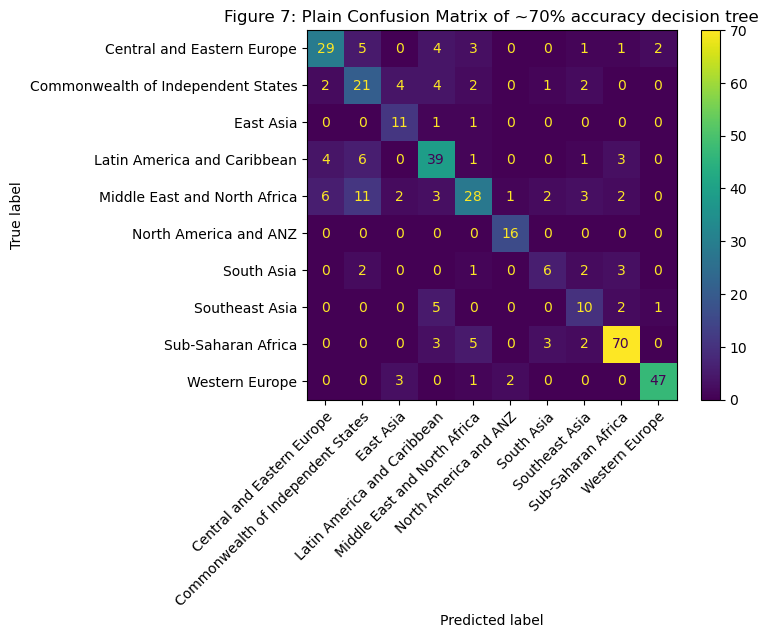

In [58]:
plot_confusion_matrix(dtree, X_test, y_test)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Figure 7: Plain Confusion Matrix of ~70% accuracy decision tree')
plt.show()
#Credits to: Elective Course: Data Science and Visualization, Lecture5_KNN_diabetes

C:\Users\ingv0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


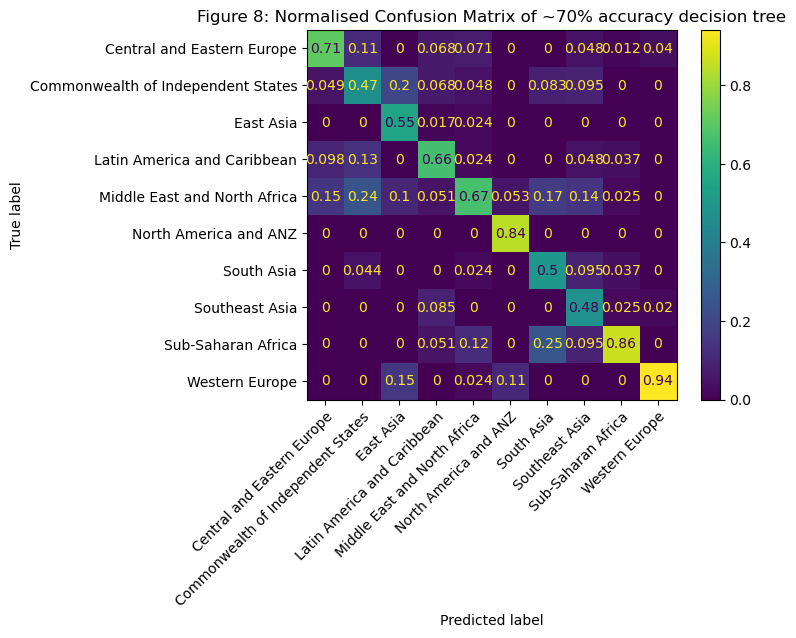

In [59]:
plot_confusion_matrix(dtree, X_test, y_test, normalize='pred')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Figure 8: Normalised Confusion Matrix of ~70% accuracy decision tree')
plt.show()
#Credits to: Elective Course: Data Science and Visualization, Lecture5_KNN_diabetes

The second pair is for the dicision tree that scored lowest with ~40-50%% accuracy. Here the diagonal axis is less clear and more scattered across the matrix, which indicates it is less precise. Also the precision values are less in figure 10 then in figure 8.

C:\Users\ingv0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


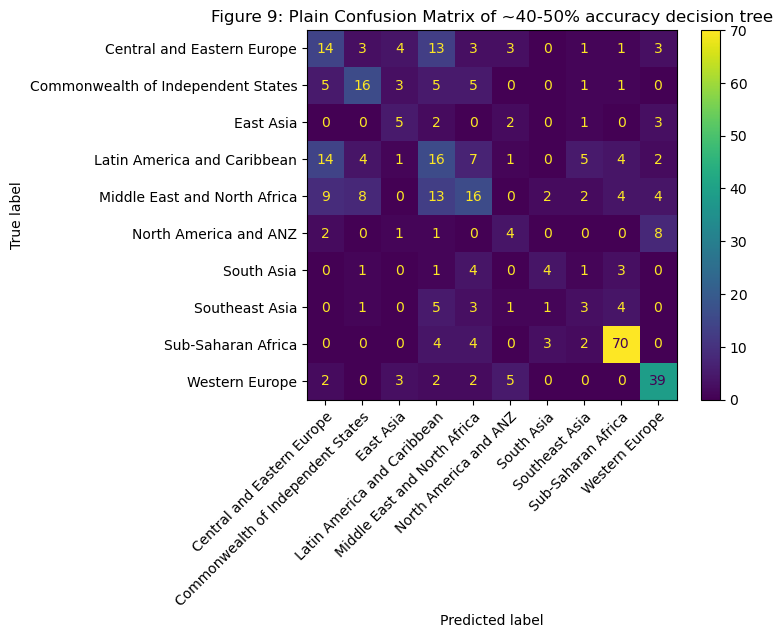

In [60]:
feature_col = df.columns.drop(['Country_name', 'Regional_indicator'])
X = df[feature_col]
y = df['Regional_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
plot_confusion_matrix(dtree, X_test, y_test)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Figure 9: Plain Confusion Matrix of ~40-50% accuracy decision tree')
plt.show()
#Credits to: Elective Course: Data Science and Visualization, Lecture5_KNN_diabetes

C:\Users\ingv0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


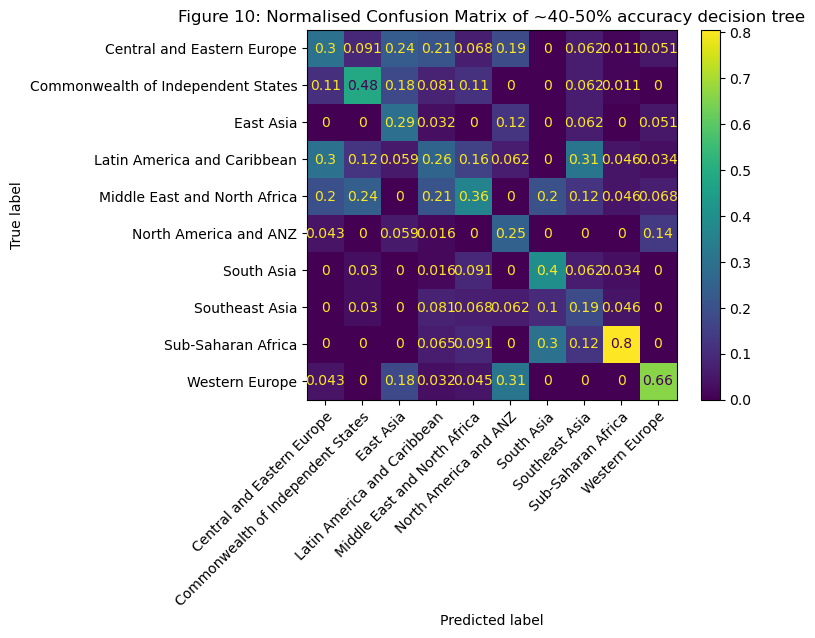

In [61]:
plot_confusion_matrix(dtree, X_test, y_test, normalize='pred')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Figure 10: Normalised Confusion Matrix of ~40-50% accuracy decision tree')
plt.show()
#Credits to: Elective Course: Data Science and Visualization, Lecture5_KNN_diabetes

### Regression

The column *Healthy life expectancy at birth* is plotted in relation to the column *Social support* as a dot-plot:

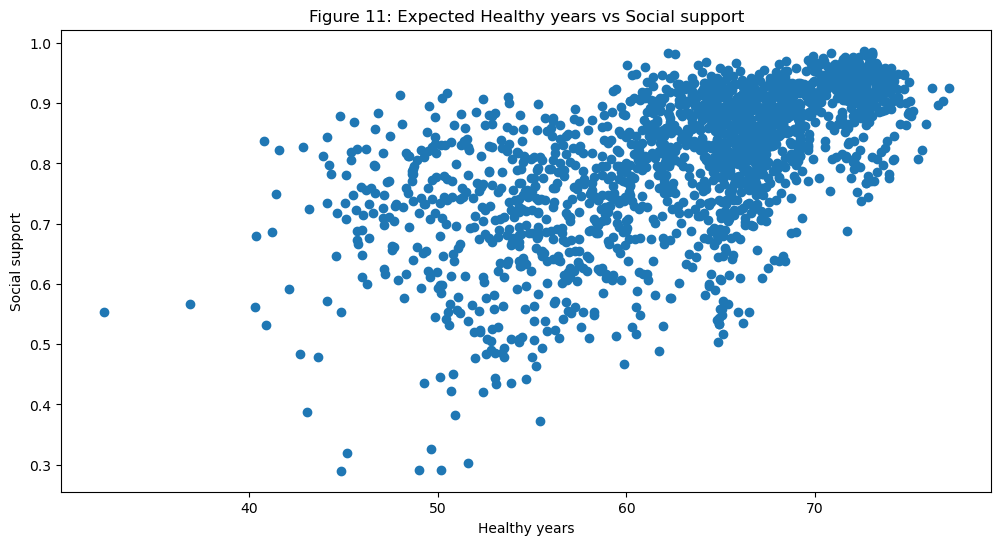

In [62]:
plt.figure(figsize=(12, 6))

plt.plot(df['Healthy_life_expectancy_at_birth'], df['Social_support'], 'o')

plt.xlabel('Healthy years')
plt.ylabel('Social support')
plt.title('Figure 11: Expected Healthy years vs Social support')

plt.show()

### A regression line is created with the purpose to describe the relation between the two variables.
#### In order to fit a regression line based on the equation of the line to a scatter plot, the individual values must first be defined or calculated

The equation of the line can be expressed as $\hat{y}=b_0+b_1x$

The values for $b_1$ and $b_0$ are found by the followinhg equations

$b_1$ = r$*$np.std(df.Social_support,ddof=1) / np.std(df.Healthy_life_expectancy_at_birth,ddof=1)

$b_0$ = np.mean(df.Social_support) - $b1*$np.mean(df.Healthy_life_expectancy_at_birth)

First, the means for the parameters *Healthy life expected at birth* and *Social support* are calculated.

In [63]:
print("Mean of the column Healthy life expected at birth:  ", np.mean(df['Healthy_life_expectancy_at_birth']))
print("Mean of the column Social support:  ", np.mean(df['Social_support']))
#Credits to: Optional Basic Course 4-8: Statistical Models

Mean of the column Healthy life expected at birth:   63.45254939418537
Mean of the column Social support:   0.812611840835852


Next, the values x, y, n, and r are defined.

r is the correlation cofficient and describes the extent to which the two variables correlate, but does not necessarily imply causality.

In [64]:
x = 'Healthy_life_expectancy_at_birth',
y = 'Social_support'

df['z_x']    = (df.Healthy_life_expectancy_at_birth - np.mean(df.Healthy_life_expectancy_at_birth))/np.std(df.Healthy_life_expectancy_at_birth,ddof=1)
df['z_y']    = (df.Social_support - np.mean(df.Social_support))/np.std(df.Social_support,ddof=1)
df['z_prod'] = df.z_x*df.z_y

n = len(df.z_prod)
r = np.sum(df.z_prod)/(n - 1) #The correlation coefficient 

print('r =', (r))
#Credits to: Optional Basic Course 4-8: Statistical Models

r = 0.6117819836085593


C:\Users\ingv0\AppData\Local\Temp\ipykernel_14684\636235505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_x']    = (df.Healthy_life_expectancy_at_birth - np.mean(df.Healthy_life_expectancy_at_birth))/np.std(df.Healthy_life_expectancy_at_birth,ddof=1)
C:\Users\ingv0\AppData\Local\Temp\ipykernel_14684\636235505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_y']    = (df.Social_support - np.mean(df.Social_support))/np.std(df.Social_support,ddof=1)
C:\Users\ingv0\AppData\Local\Temp\ipyker

In [65]:
b1 = r*np.std(df.Social_support,ddof=1)/np.std(df.Healthy_life_expectancy_at_birth,ddof=1)
b0 = np.mean(df.Social_support) - b1*np.mean(df.Healthy_life_expectancy_at_birth)
print('b0 =', (b0), ',' ,'b1 =',   (b1))
#Credits to: Optional Basic Course 4-8: Statistical Models

b0 = 0.19776832960826385 , b1 = 0.009689815729987531


Ultimately the regression line is plottet together with the dot plot.

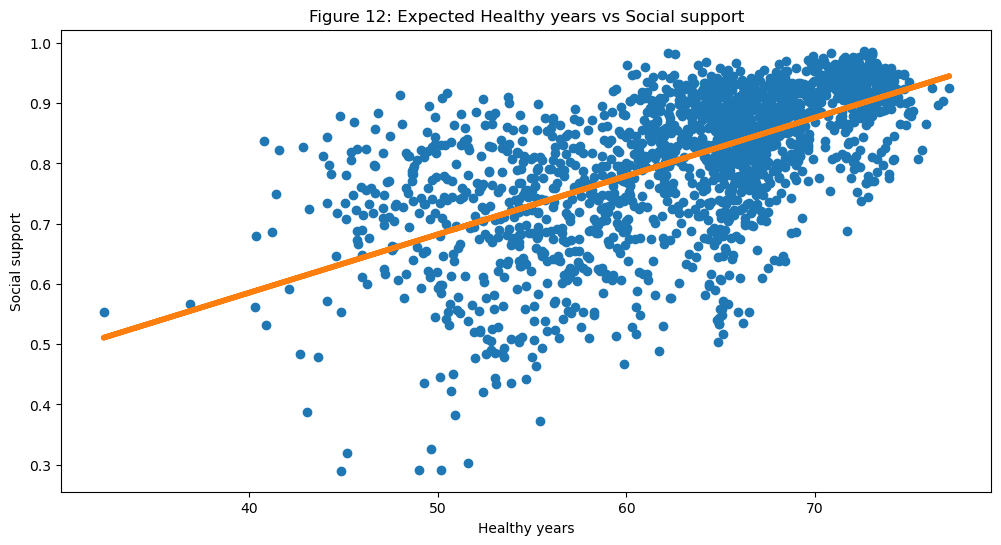

In [66]:
plt.figure(figsize=(12, 6))


plt.plot(df['Healthy_life_expectancy_at_birth'], df['Social_support'], 'o')
plt.plot(df.Healthy_life_expectancy_at_birth,b0+b1*df.Healthy_life_expectancy_at_birth,'-',label='Regression line ($\hat{y}=b_0+b_1x$)', linewidth = '4')


plt.xlabel('Healthy years')
plt.ylabel('Social support')
plt.title('Figure 12: Expected Healthy years vs Social support')

plt.show()
#Credits to: Optional Basic Course 4-8: Statistical Models

There is a wide distribution of the values, which is supported by the slope (r = 0.61).

## 5. Conclusion and Discussion

The way we have chosen to present the data set, enables us to handle all missing values more properly and thereby to conduct multiple analysis and modelling. In the first section, two columns were excluded with the purpose to specify the data set. In section two, two columns were excluded as well due to the high number of missing values. However, it might be a disadvantage for the modelling where the most precise results require as much data as possible. Overall, the removal of the four columns makes the data set easier to work with and helps specify our aim of the project. Nonetheless, the modelling might be less valid due to a minor data set which will be considered for further mini projects.

In section three, exploratory data analysis (EDA) was conducted to visualise parts of the data set in a manageable way. A pie chart (figure 1) was created to present an overview of the number of countries that belong to the specific region, which also could be represented by, e.g., a bar plot. We chose a bar plot and a line plot to compare the progress of *Log GDP per capita*/*Healthy life expectancy at birth* in the timeframe (figure 2 to 5). It can be seen that the bar plot (figure 6) could be more comprehensible if the *Regional indicator* only were written once and if each *Regional indicator* was represented by its own colour. Furthermore, the data could also be represented by a scatter plot where the distribution also will be visualised.

In section four, classification is conducted to validate the features of the selected columns.  The accuracy had a validation between 40–50% where the minimum accuracy should be ~70%. Thereby, our accuracy is not valid and the data can not be trusted. However, by including all columns our accuracy is ~70% which is more likely to be acceptable.

Confusion matrix were made to visualise the comparison of the predicted and actual classes based on the classification. The two confusion matrix showed different outputs. Figure 7 consisted of 5 columns and showed a diagonal axis from the top-left to bottom-right side, where the other plain confusion matrix (figure 9) consisted of only 2 columns and showed a more scattered distribution from the diagonal line compared to figure 7. This indicated that figure 7 was more precise than figure 9. Additionally by looking at the normalised confusion matrix (figure 8 and 10), an estimated precision was given on the diagonal line for each true value.

Furthermore, a scatter plot was created for the columns *Healthy life expectancy at birth* and *Social support* (figure 11). A regression line (figure 12) for the plot was added to describe the extent of correlation between the two variables. The correlation coefficient of 0.61 demonstrates a relative correlation, however, it should be acknowledged that correlation does not necessarily imply causality.

For further expansion of the project other modelling can be considered such as clustering and association rules to group data and identify relationships.
